In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("processed.cleveland.data",
                 names=columns, na_values="?")

In [3]:
df = df.dropna()

In [4]:
x = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

In [6]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [7]:
print("PCA applied. Shape:", x_pca.shape)

PCA applied. Shape: (297, 13)


In [8]:
n_components_95 = (cumulative_variance < 0.95).sum() + 1
print(f"Optimal components to retain 95% variance: {n_components_95}")

Optimal components to retain 95% variance: 12


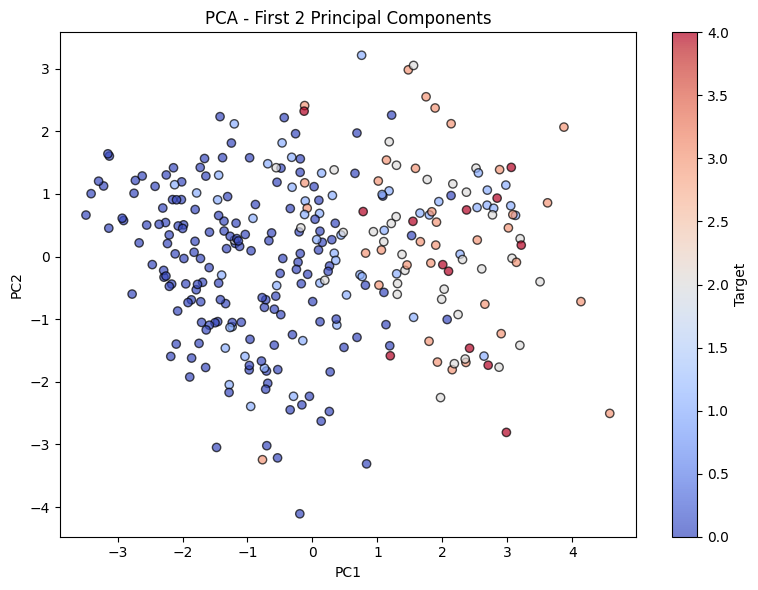

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First 2 Principal Components")
plt.colorbar(label="Target")
plt.tight_layout()
plt.savefig("pca_scatter.png")
plt.show()

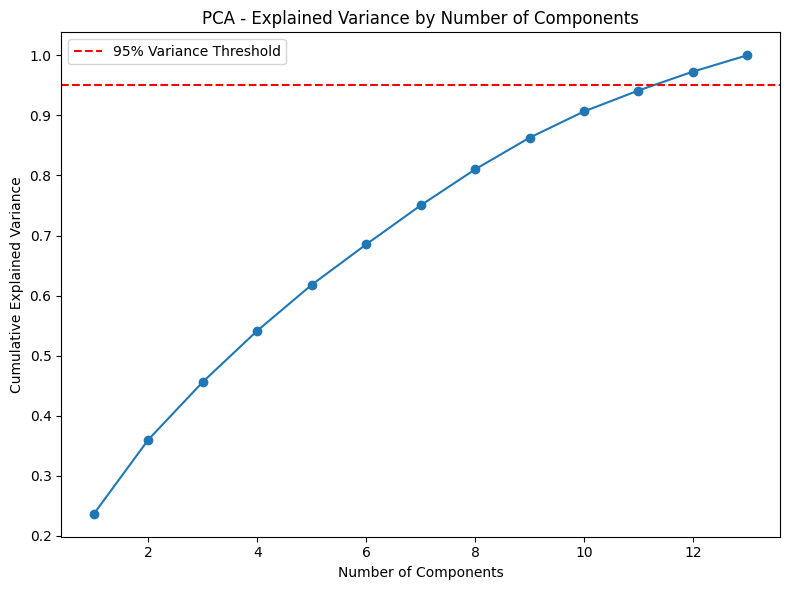

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% Variance Threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance by Number of Components")
plt.legend()
plt.tight_layout()
plt.show()
